  0%|          | 0/5000 [00:00<?, ?it/s]

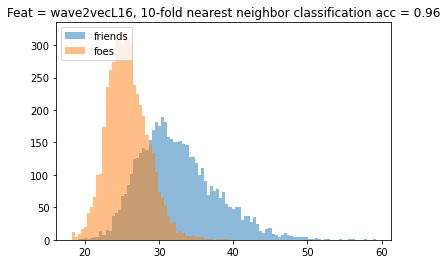

In [86]:
from matplotlib import pyplot
from tqdm.notebook import tqdm
import numpy as np
import random
import os
from scipy import spatial

from sklearn.model_selection import train_test_split
from KWSDML import calculate_scores
total = 0
for _class in classes:
    total += len(os.listdir(os.path.join(feat_address, _class)))

all_samples = np.zeros((1024, total))
labels = []
ctr = 0

for inx, _class in enumerate(classes):
    for sample in os.listdir(os.path.join(feat_address, _class)):
        path = os.path.join(feat_address, _class, sample)
        emb = np.squeeze(np.load(path))  
        all_samples[:, ctr] = emb
        labels.append(inx)
        ctr += 1

feat_address = 'qualcomm-wav2vec2'

classes = os.listdir(feat_address)
K = len(classes)

len_analsis=5000

friends = np.empty((len_analsis), dtype=np.float32)
foes = np.empty((len_analsis), dtype=np.float32)

for i in tqdm(range(len_analsis)):
    c1, c2 = random.sample(range(K), 2)
    friend_class_indices = os.listdir(os.path.join(feat_address, classes[c1]))
    foe_class_indices = os.listdir(os.path.join(feat_address, classes[c2]))
    anchor_inx, friend_inx = random.sample(list(friend_class_indices), 2)
    foe_inx = random.sample(list(foe_class_indices),1) [0]

    anchor_path = os.path.join(feat_address, classes[c1], anchor_inx)
    anchor = np.squeeze(np.load(anchor_path))  

    friend_path = os.path.join(feat_address, classes[c1], friend_inx)
    friend = np.squeeze(np.load(friend_path))  

    foe_path = os.path.join(feat_address, classes[c2], foe_inx)
    foe = np.squeeze(np.load(foe_path))  

    friends[i] = np.inner(anchor, friend).item()
    foes[i] = np.inner(anchor, foe).item()
    
acc = 0
for state in range(10):    
    X_train, X_test, y_train, y_test = train_test_split(all_samples.T, labels, test_size=0.9, random_state=state)
    medoids = np.empty((1024, 4), dtype=np.float32)
    for _class in range(len(classes)):
        class_inx = (np.squeeze(y_train) == _class)
        class_samples = X_train[class_inx,:]
        medoids[:,_class] = np.mean(class_samples, axis=0)    
    acc += calculate_scores(X_test, medoids, y_test)

beg = min((min(friends), min(foes)))
end = max((max(friends), max(foes)))
bins = np.linspace(beg, end, 100)
pyplot.hist(friends, bins, alpha=0.5, label='friends')
pyplot.legend(loc='upper left')
pyplot.hist(foes, bins, alpha=0.5, label='foes')
pyplot.legend(loc='upper left')
pyplot.title(f'Feat = wave2vecL16, 10-fold nearest neighbor classification acc = {acc/10:.2f}')
pyplot.show()

In [93]:
import glob
import librosa
fals_samples_folder = '/home/batuhangundogdu/SE/train'

false_path_list = []
false_path_list.extend(glob.glob(os.path.join(fals_samples_folder, f"**/*.flac"), recursive=True))


In [99]:
shift = 8000
input_length = 24000
sr = 16000
audio_ctr = 0
false_samples = []

while len(false_samples)<18000:
    waveform, sr = librosa.load(false_path_list[audio_ctr], sr=sr)
    starting_index = 0
    while starting_index + input_length < waveform.shape[0]:
        false_wav = waveform[starting_index:starting_index + input_length]
        starting_index += shift
        false_samples.append(false_wav)
    audio_ctr += 1

/home/batuhangundogdu/anaconda3/lib/python3.8/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [103]:
from transformers import Wav2Vec2Processor, Wav2Vec2ForSequenceClassification

In [104]:
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-large-960h")
model = Wav2Vec2ForSequenceClassification.from_pretrained("facebook/wav2vec2-large-960h", output_hidden_states=True)
layer = 16

Some weights of the model checkpoint at facebook/wav2vec2-large-960h were not used when initializing Wav2Vec2ForSequenceClassification: ['lm_head.weight', 'lm_head.bias']
- This IS expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-large-960h and are newly initialized: ['wav2vec2.masked_spec_embed', 'classifier.bias', 'projector.bias', 'projector.weight', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to b

In [107]:
len(w2v_false)

2313

  0%|          | 0/5000 [00:00<?, ?it/s]

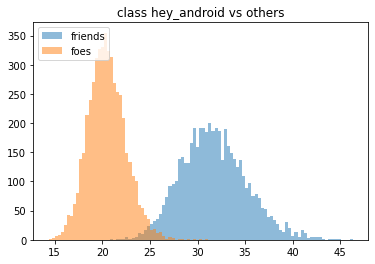

In [112]:
len_analsis=5000

friends = np.empty((len_analsis), dtype=np.float32)
foes = np.empty((len_analsis), dtype=np.float32)
c1 = 2
for i in tqdm(range(len_analsis)):
    friend_class_indices = os.listdir(os.path.join(feat_address, classes[c1]))
    anchor_inx, friend_inx = random.sample(list(friend_class_indices), 2)

    anchor_path = os.path.join(feat_address, classes[c1], anchor_inx)
    anchor = np.squeeze(np.load(anchor_path))  

    friend_path = os.path.join(feat_address, classes[c1], friend_inx)
    friend = np.squeeze(np.load(friend_path))  

    foe = random.sample(w2v_false, 1)[0]
    friends[i] = np.inner(anchor, friend).item()
    foes[i] = np.inner(anchor, foe).item()
    

beg = min((min(friends), min(foes)))
end = max((max(friends), max(foes)))
bins = np.linspace(beg, end, 100)
pyplot.hist(friends, bins, alpha=0.5, label='friends')
pyplot.legend(loc='upper left')
pyplot.hist(foes, bins, alpha=0.5, label='foes')
pyplot.legend(loc='upper left')
pyplot.title(f'class {classes[c1]} vs others')
pyplot.show()